In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

In [2]:
stocks = ['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR']

In [3]:
def get_dates(lst, start_str, end_str):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_str)&(data['time']<end_str)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [4]:
def get_prices(lst,start_str, end_str):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_str)&(df['date']<end_str)]    # make sure date start from 2016-01-01
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

In [5]:
date = get_dates(stocks,'2015-01-01','2020-01-01')
prices = get_prices(stocks,'2015-01-01','2020-01-01')

In [6]:
stock_prices = pd.DataFrame(np.array(prices).T, columns=stocks , index=np.array(date).T)
stock_prices.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.600000,908.29999,2235.5,2970.0,2848.0,188.00000,134.89999,2606.0
2015-01-05,1182.0,470.79999,462.00000,1369.5,603.90002,101.400000,909.70001,2128.5,2883.5,2832.0,181.60001,133.80000,2573.0
2015-01-06,1109.0,464.00000,456.70001,1357.0,593.70001,94.400000,896.79999,2121.0,2944.5,2784.0,178.80000,131.10001,2574.0
2015-01-07,1109.0,463.29999,462.70001,1379.0,601.00000,95.159998,917.50000,2148.5,2962.5,2800.0,182.00000,132.39999,2591.0
2015-01-08,1131.0,483.20001,468.89999,1427.5,606.20001,97.000000,932.40002,2200.0,3027.5,2849.0,209.25000,132.80000,2668.0


In [7]:
stock_prices.tail()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2019-12-23,2433.0,420.39999,577.79999,1815.0,599.00000,832.00000,965.70001,2259.0,4559.0,9065.0,253.00000,191.50000,4429.0
2019-12-24,2437.0,422.60001,578.79999,1817.6,599.40002,834.40002,959.20001,2275.5,4535.0,9055.0,253.39999,192.60001,4389.5
2019-12-27,2446.0,422.20001,579.59998,1818.8,597.79999,844.20001,961.29999,2271.0,4548.5,9125.0,256.00000,194.45000,4416.0
2019-12-30,2405.0,420.20001,566.79999,1798.0,596.29999,832.20001,953.50000,2247.5,4507.0,9020.0,255.50000,194.00000,4373.0
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.20000,193.39999,4350.5


#### Using df to facilitate following steps

In [8]:
df = stock_prices

### 每年平均红利的回报率

In [9]:
div_5yrs_roi = [0.11866882, 0.2415348 , 0.233164  , 0.289224  , 0.38235506,
       0.07657471, 0.24634204, 0.4204902 , 0.4592588 , 0.15537502,
       0.05281924, 0.14314283, 0.27294232]  # 结果从‘红利5年收益计算’复制粘贴而来

In [10]:
div_5yrs_mean_roi = np.array(div_5yrs_roi) / 5
div_5yrs_mean_roi

array([0.02373376, 0.04830696, 0.0466328 , 0.0578448 , 0.07647101,
       0.01531494, 0.04926841, 0.08409804, 0.09185176, 0.031075  ,
       0.01056385, 0.02862857, 0.05458846])

### covariance

In [11]:
# Log of percentage change, methods: .pct_change()  and  np.log(1+x)
# covariance : .cov()
# 但cov对彼此间的强弱关系度量magnitude不是很直观 
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix.head(2)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.000365,0.000125,0.000100,0.000065,0.000106,0.000090,0.000026,0.000107,0.000154,0.000121,0.000072,0.000120,0.000047
AV,0.000125,0.000228,0.000079,0.000045,0.000102,0.000104,0.000032,0.000084,0.000107,0.000080,0.000106,0.000175,0.000039


### .corr() 直观看到各股之间的correlation

In [12]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix.head(2)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,1.000000,0.434803,0.417014,0.290717,0.436607,0.244262,0.118947,0.36753,0.404094,0.463824,0.215066,0.294437,0.199265
AV,0.434803,1.000000,0.417631,0.254827,0.532805,0.356912,0.182602,0.36652,0.356894,0.386856,0.398520,0.543614,0.210840


### create weights for the portfolio 制定权数

In [13]:
weights = np.full(shape=len(stocks), fill_value=1/len(stocks), dtype=np.float)
colnames = df.columns

print(weights,colnames)

[0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308] Index(['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX',
       'TSCO', 'TW', 'ULVR'],
      dtype='object')


### portfolio variance

In [14]:
port_weights = dict(zip(colnames,weights))

port_var = cov_matrix.mul(port_weights, axis=0).mul(port_weights, axis=1).sum().sum()

port_var # seems like the variance of the portfolio is very low

8.279508798695496e-05

### each stocks' mean return in certain amount of years

In [15]:
df.resample('Y').last()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-12-31,1119.0,516.00000,499.60001,1373.0,536.20001,208.20000,937.50000,1543.0,1979.5,3283.0,149.50000,203.10001,2926.5
2016-12-31,1580.0,486.39999,591.50000,1562.0,656.90002,317.89999,951.59998,2354.0,3158.5,4184.0,206.85001,153.50000,3292.5
2017-12-31,1992.0,506.50000,573.00000,1322.5,766.90002,336.20001,875.09998,2508.5,3942.0,5620.0,209.25000,206.39999,4125.5
2018-12-31,1637.0,375.50000,459.20001,1491.2,646.90002,348.79999,764.20001,2340.0,3730.0,6240.0,190.10001,136.25000,4108.5
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.20000,193.39999,4350.5


In [16]:
stock_mean_return = df.resample('Y').last().pct_change().mean() 
stock_mean_return

AHT     0.242293
AV     -0.039908
BA      0.046008
GSK     0.076222
HSBA    0.037765
JD      0.505686
NG      0.010898
RDSB    0.120278
RIO     0.249281
SPX     0.288164
TSCO    0.161537
TW      0.044997
ULVR    0.108211
dtype: float64

## 以上，我们有了资本的stock_mean_return，还要加上红利的年收益率

In [17]:
div_5yrs_mean_roi

array([0.02373376, 0.04830696, 0.0466328 , 0.0578448 , 0.07647101,
       0.01531494, 0.04926841, 0.08409804, 0.09185176, 0.031075  ,
       0.01056385, 0.02862857, 0.05458846])

In [18]:
stock_mean_return = stock_mean_return + div_5yrs_mean_roi
stock_mean_return

AHT     0.266026
AV      0.008399
BA      0.092641
GSK     0.134066
HSBA    0.114236
JD      0.521001
NG      0.060166
RDSB    0.204376
RIO     0.341133
SPX     0.319239
TSCO    0.172101
TW      0.073625
ULVR    0.162800
dtype: float64

#### calculate the portfolio returns, by adding the weights on each stock

这里有一个与之前计算不同的地方，按每年末价格计算，年均portfolio_return = 0.1424

但是，之前，按每天来做cumulative来计算，年均portfolio_return = 0.224

之前还用末年和初年，仅两年的数据算过一个数据，年均portfolio_return = 0.1467

### 第一个数据与第三个数据基本吻合，证明计算过程应该没有问题。是两种计算方式，产生了差距。需要继续验证那种方式更加准确。

In [19]:
portfolio_return = (weights * stock_mean_return).sum()
portfolio_return

0.1899853594778677

#### calculate volatility is given by the annual standard deviation. Multiply by 250 because there are 250 trading days/year.

In [20]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AHT     0.301952
AV      0.238651
BA      0.198753
GSK     0.186321
HSBA    0.201516
JD      0.304766
NG      0.181236
RDSB    0.241384
RIO     0.314986
SPX     0.215461
TSCO    0.277396
TW      0.336443
ULVR    0.194253
dtype: float64

#### Creating a table for visualising returns and volatility of assets


In [21]:
assets = pd.concat([stock_mean_return, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets 

,Returns,Volatility
AHT,0.266026,0.301952
AV,0.008399,0.238651
BA,0.092641,0.198753
GSK,0.134066,0.186321
HSBA,0.114236,0.201516
JD,0.521001,0.304766
NG,0.060166,0.181236
RDSB,0.204376,0.241384
RIO,0.341133,0.314986
SPX,0.319239,0.215461


Text(0, 0.5, 'Volatility')

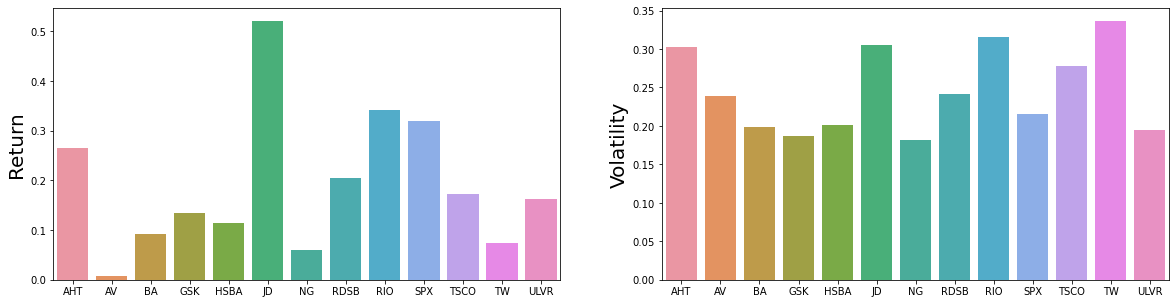

In [22]:
fig, ax = plt.subplots(ncols=2,figsize=(20, 5))
ax[0] = sns.barplot(x=assets.index, y="Returns", data=assets, ax=ax[0])    
ax[1] = sns.barplot(x=assets.index, y="Volatility", data=assets, ax=ax[1])   
ax[0].set_ylabel('Return',fontsize=20)
ax[1].set_ylabel('Volatility',fontsize=20)

In [23]:
nn = assets.sort_values(by='Returns', ascending=False).reset_index()

In [24]:
nn.index = nn.index +1

#### Plotting the efficient frontier

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.


In [25]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights,cumulative sum must be 1

num_assets = len(df.columns)
num_portfolios = 10000 # Run 10000 times

In [26]:
weights = np.random.random(num_assets)
# weights = weights/np.sum(weights)
# p_weights.append(weights)

In [27]:
len(df.columns)

13

In [28]:
(weights/weights.sum()).sum()

1.0

In [29]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, stock_mean_return) # Returns are the product of individual expected returns of asset and its weights
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
# 10000 times needs approximately 15 seconds

In [30]:
returns = np.dot(weights, stock_mean_return)
returns

0.15686135449823518

# 这里就是我思考的问题，如果我要把mean return和另一个notes里的红利5年数据相加，mean_return应该用天还是用年计算，我这里的mean_return的结果是每年的

In [31]:
stock_mean_return 

AHT     0.266026
AV      0.008399
BA      0.092641
GSK     0.134066
HSBA    0.114236
JD      0.521001
NG      0.060166
RDSB    0.204376
RIO     0.341133
SPX     0.319239
TSCO    0.172101
TW      0.073625
ULVR    0.162800
dtype: float64

In [32]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [33]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AHT weight,AV weight,BA weight,GSK weight,HSBA weight,JD weight,NG weight,RDSB weight,RIO weight,SPX weight,TSCO weight,TW weight,ULVR weight
0,0.196632,0.145289,0.106806,0.093572,0.014392,0.137876,0.103794,0.078376,0.106863,0.043156,0.077149,0.092594,0.124230,0.011588,0.009603
1,0.177393,0.155856,0.016602,0.121786,0.157814,0.072044,0.078937,0.079596,0.019311,0.153202,0.117048,0.021016,0.058825,0.100342,0.003477
2,0.188550,0.151605,0.075134,0.131553,0.035818,0.022142,0.034485,0.069204,0.085087,0.019928,0.098793,0.094924,0.153790,0.085816,0.093325
3,0.185089,0.145046,0.051045,0.037114,0.045075,0.116612,0.113977,0.029337,0.134586,0.147312,0.121945,0.061213,0.105101,0.003607,0.033076
4,0.184432,0.154554,0.099785,0.122310,0.044370,0.113693,0.072207,0.046642,0.011390,0.052796,0.119719,0.061916,0.073107,0.104810,0.077254


In [34]:
portfolios.describe()

,Returns,Volatility,AHT weight,AV weight,BA weight,GSK weight,HSBA weight,JD weight,NG weight,RDSB weight,RIO weight,SPX weight,TSCO weight,TW weight,ULVR weight
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.190036,0.147802,0.077088,0.076749,0.076754,0.077313,0.076760,0.076834,0.076817,0.076880,0.077454,0.076573,0.077035,0.077141,0.076602
std,0.022529,0.006264,0.044551,0.044087,0.044415,0.044411,0.044555,0.044280,0.044560,0.044084,0.044315,0.044374,0.044378,0.044251,0.044525
min,0.101549,0.130907,0.000003,0.000006,0.000012,0.000002,0.000013,0.000041,0.000013,0.000025,0.000039,0.000004,0.000064,0.000013,0.000011
25%,0.174721,0.143348,0.039931,0.040323,0.039509,0.040275,0.038823,0.040208,0.039777,0.040223,0.041192,0.039555,0.039837,0.040960,0.039586
50%,0.190194,0.147249,0.077465,0.076452,0.076327,0.077224,0.076881,0.076223,0.077594,0.076801,0.077668,0.076257,0.077296,0.077370,0.076367
75%,0.205232,0.151706,0.111708,0.110303,0.110937,0.112134,0.111845,0.111161,0.111013,0.111363,0.111377,0.110786,0.111360,0.111227,0.111566
max,0.284105,0.180192,0.254633,0.246356,0.280233,0.274399,0.261423,0.282628,0.258427,0.242497,0.244050,0.247101,0.242057,0.261082,0.260767


###  maxium return portfolio

In [35]:
max_rtn = pd.DataFrame(portfolios.iloc[portfolios['Returns'].idxmax()])
max_rtn.iloc[:2]

,7102
Returns,0.284105
Volatility,0.160712


In [36]:
max_rtn.iloc[2:].sort_values(by=[max_rtn.columns[0]], ascending=False)

,7102
SPX weight,0.219349
JD weight,0.215370
HSBA weight,0.113684
RIO weight,0.109834
TSCO weight,0.093745
AHT weight,0.074290
TW weight,0.060422
BA weight,0.045567
GSK weight,0.018671
AV weight,0.016963


### Find the lowest volatility portfolio

In [37]:
min_vol = pd.DataFrame(portfolios.iloc[portfolios['Volatility'].idxmin()])
min_vol.iloc[:2]

,1780
Returns,0.183127
Volatility,0.130907


In [38]:
min_vol.iloc[2:].sort_values(by=[min_vol.columns[0]], ascending=False)

,1780
BA weight,0.168075
NG weight,0.158336
SPX weight,0.141136
HSBA weight,0.085913
ULVR weight,0.082915
JD weight,0.082876
TSCO weight,0.081555
RDSB weight,0.078962
GSK weight,0.072359
AV weight,0.023239


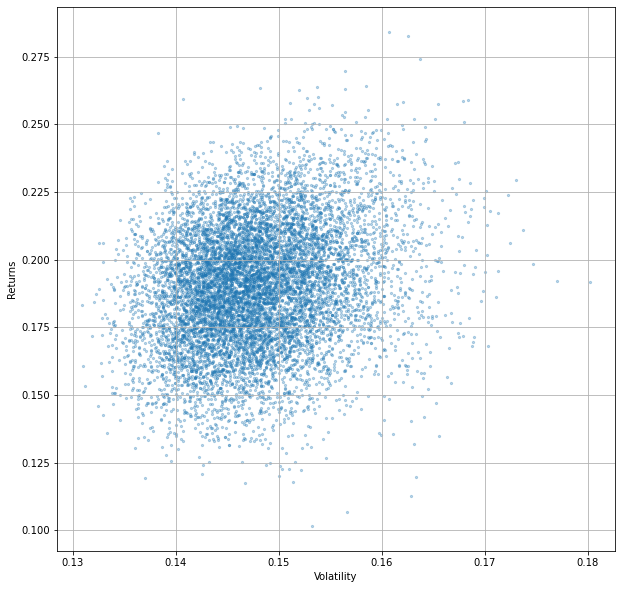

In [39]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=5, alpha=0.3, grid=True, figsize=[10,10]);

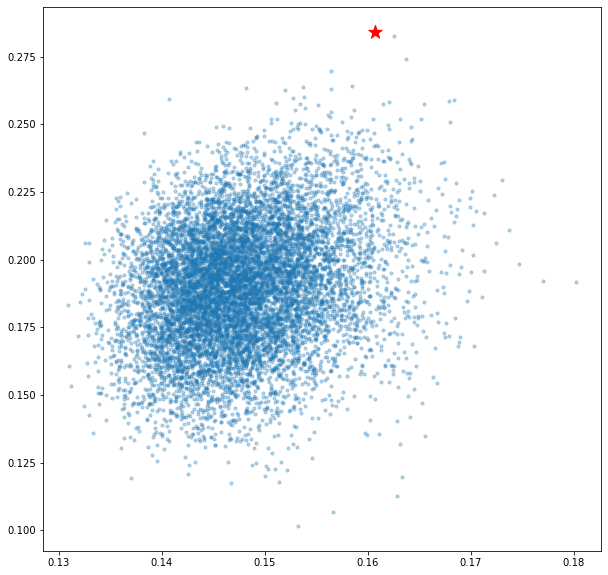

In [40]:
# plotting the maxium return portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(max_rtn.iloc[1], max_rtn.iloc[0], color='r', marker='*', s=200);

In [41]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.183127
Volatility     0.130907
AHT weight     0.006123
AV weight      0.023239
BA weight      0.168075
GSK weight     0.072359
HSBA weight    0.085913
JD weight      0.082876
NG weight      0.158336
RDSB weight    0.078962
RIO weight     0.012786
SPX weight     0.141136
TSCO weight    0.081555
TW weight      0.005724
ULVR weight    0.082915
Name: 1780, dtype: float64

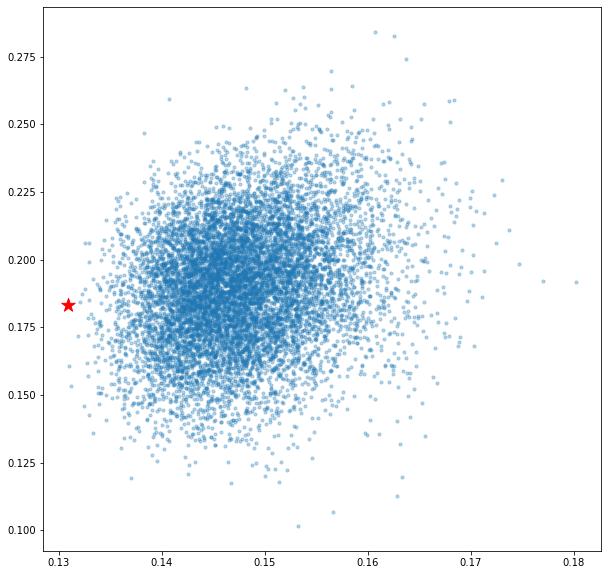

In [42]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);

#### Sharpe Ratio

Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.


In [43]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.259363
Volatility     0.140699
AHT weight     0.048226
AV weight      0.011517
BA weight      0.065904
GSK weight     0.142428
HSBA weight    0.013968
JD weight      0.163492
NG weight      0.107762
RDSB weight    0.011139
RIO weight     0.119717
SPX weight     0.217525
TSCO weight    0.015049
TW weight      0.008164
ULVR weight    0.075110
Name: 4200, dtype: float64

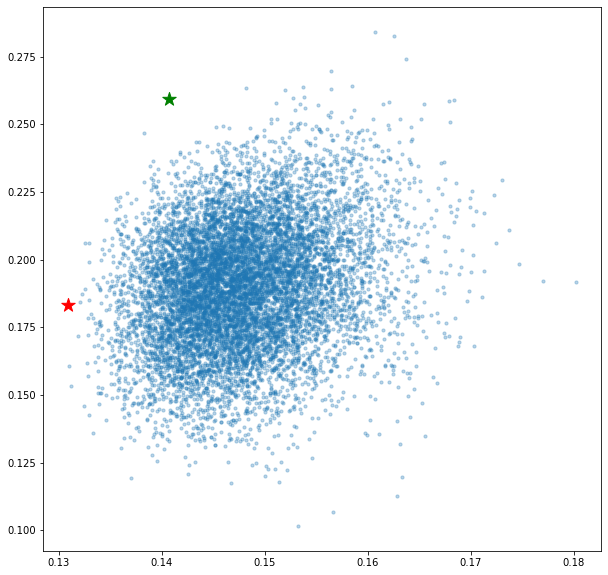

In [44]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=200);

In [45]:
optimal_risky_port = pd.DataFrame(optimal_risky_port)
optimal_risky_port.iloc[:2]

,4200
Returns,0.259363
Volatility,0.140699


In [46]:
optimal_risky_port.iloc[2:].sort_values(by = optimal_risky_port.columns[0], ascending=False)

,4200
SPX weight,0.217525
JD weight,0.163492
GSK weight,0.142428
RIO weight,0.119717
NG weight,0.107762
ULVR weight,0.075110
BA weight,0.065904
AHT weight,0.048226
TSCO weight,0.015049
HSBA weight,0.013968


In [47]:
(optimal_risky_port.iloc[2:].values)

array([[0.04822615],
       [0.01151675],
       [0.06590352],
       [0.14242756],
       [0.01396751],
       [0.16349196],
       [0.10776151],
       [0.01113923],
       [0.11971716],
       [0.21752537],
       [0.01504933],
       [0.00816378],
       [0.07511017]])

In [48]:
[i[0] for i in optimal_risky_port.iloc[2:].values]

[0.04822614554102497,
 0.01151674654445576,
 0.06590352330666555,
 0.1424275566925055,
 0.013967511263615796,
 0.16349196085376433,
 0.10776150854749506,
 0.011139229884371405,
 0.11971715739402242,
 0.2175253733150724,
 0.015049328803317328,
 0.008163783194376717,
 0.07511017465931277]

In [49]:
stocks

['AHT',
 'AV',
 'BA',
 'GSK',
 'HSBA',
 'JD',
 'NG',
 'RDSB',
 'RIO',
 'SPX',
 'TSCO',
 'TW',
 'ULVR']